# Example using MEGNet with Molecules
This example shows how to use MEGNet with molecular data. It will require that you have installed MEGNet with the extra depedencies for molecules, as described in the documentation.

## Load data
Our first step is to load a subset of the QM9 dataset that we provide for demonstration purposes. 
The dataset contains the XYZ coordinates and atomization energies for each molecule.

In [1]:
import tensorflow as tf
import pandas as pd

In [2]:
data = pd.read_json('molecules.json').sample(1000)

We need to convert the XYZ files (stored as strings) to an OpenBabel data object before using the data to train MEGNet

In [3]:
from pybel import readstring
structures = [readstring('xyz', x) for x in data['xyz']]

In [4]:
targets = data['u0_atom'].tolist()  # Atomization energy computed with B3LYP DFT

## Set Up and Train Model
Here, we set up the MEGNet to use the MolecularGraph representation to compute the connectivity of the molecule and the features for each atom and bond. We do use the default settings for the MolecularGraph calculator

In [5]:
from megnet.data.molecule import MolecularGraph
from megnet.models import MEGNetModel

model = MEGNetModel(27, 2, 27, nblocks=1, lr=1e-2,
                    n1=4, n2=4, n3=4, npass=1, ntarget=1,
                    graph_converter=MolecularGraph())

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.


Instructions for updating:
Colocations handled automatically by placer.


The model training tool will generate the graph representations of each molecule first, and the train the neural network

In [6]:
mg = MolecularGraph()

In [7]:
%%time
model.train(structures, targets, epochs=24, verbose=0)

Instructions for updating:
Use tf.cast instead.


Instructions for updating:
Use tf.cast instead.


Instructions for updating:
Deprecated in favor of operator or tf.math.divide.


Instructions for updating:
Deprecated in favor of operator or tf.math.divide.


CPU times: user 1min 53s, sys: 11.9 s, total: 2min 5s
Wall time: 1min 46s


# Prediction
Use the ML model to predict the atomization of each model. We are both using an unconverged network and the training set molecules because this intended to demonstrate 

In [8]:
predicted_atom = [model.predict_structure(x) for x in structures]

Make a predicted vs actual plot

In [9]:
from matplotlib import pyplot as plt

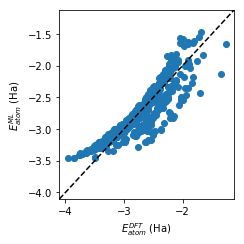

In [10]:
fig, ax = plt.subplots()

ax.scatter(targets, predicted_atom)

# Add the y=x line
lim = [min(ax.get_xlim() + ax.get_ylim()), max(ax.get_xlim() + ax.get_ylim())]
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.plot(lim, lim, 'k--')

ax.set_xlabel('$E_{atom}^{DFT}$ (Ha)')
ax.set_ylabel('$E_{atom}^{ML}$ (Ha)')

fig.set_size_inches(3.5, 3.5)
fig.tight_layout()

The network does not perform well, which is unsurprising given the small amount of training data and small number of epochs. 